<a href="https://colab.research.google.com/github/sorour1989/DCS-POP1-2020-21-sorour1989/blob/main/soori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Transaction data/1 January 2022.xlsx')
# df2 = pd.read_excel('/content/drive/MyDrive/Transaction data/10 October 2022.xlsx')
# df = pd.concat([df1,df2],axis = 0)
df = df1

# Pre Processing

# New Section

In [ ]:
# df = pd.concat([df1,df2],axis = 0)
df

,trans_id,prov_id,trans_hostname,cust_id,site_id,cont_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,...,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,trans_call_charge,trans_crash,trans_oper_reason,trans_notes,trans_updated
0,6150183,92,172.16.100.67,NaN,NaN,NaN,NaN,NaN,26161911,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,NaN,NaN,2022-01-01 00:05:16
1,6150185,92,172.16.100.66,702.0,10408.0,NaN,2556.0,12548.0,26161913,26161917.0,...,9.0300,3900.0,47.0,30.55000,0.44,0.0,0,NaN,NaN,2022-01-01 01:09:58
2,6150189,92,172.16.100.62,1088.0,23552.0,NaN,2586.0,5000.0,26161921,26161929.0,...,0.9730,420.0,42.0,2.94000,0.05,0.0,0,NaN,NaN,2022-01-01 00:21:19
3,6150191,92,172.16.100.63,576.0,7574.0,NaN,2562.0,2960.0,26161931,26161935.0,...,0.1657,120.0,48.0,0.96000,0.02,0.0,0,NaN,NaN,2022-01-01 00:20:29
4,6150195,92,172.16.100.65,576.0,7574.0,NaN,2302.0,14104.0,26161945,26161953.0,...,0.5927,300.0,48.0,2.40000,0.02,0.0,0,NaN,NaN,2022-01-01 00:38:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65318,6443987,92,172.16.100.63,1088.0,23552.0,NaN,2582.0,5920.0,27391983,27391991.0,...,3.7473,1620.0,42.0,11.34000,0.18,0.0,0,NaN,NaN,2022-02-01 00:04:07
65319,6443989,92,172.16.100.64,NaN,NaN,NaN,NaN,NaN,27391997,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,NaN,NaN,2022-01-31 23:38:00
65320,6443993,92,172.16.100.62,NaN,NaN,NaN,NaN,NaN,27392005,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,Caller failed to enter valid PIN,NaN,2022-01-31 23:44:33
65321,6443995,92,172.16.100.67,532.0,6274.0,NaN,2544.0,7296.0,27392011,27392015.0,...,5.3107,2276.0,52.0,19.72533,0.25,0.0,0,NaN,NaN,2022-02-01 00:22:37


In [ ]:
df['Duration'] = np.where((df['trans_int_time_t'].notnull()) & (df['trans_wait_time_t'].notnull()),df['trans_int_time_t']-df['trans_wait_time_t'],np.nan)
df = df.drop(['trans_id','trans_start_time','trans_end_time','trans_int_time','trans_updated','trans_wait_time_t','trans_int_time_t','trans_wait_time'],axis=1)
df

,prov_id,trans_hostname,cust_id,site_id,cont_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,trans_backup_call_id,...,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,trans_call_charge,trans_crash,trans_oper_reason,trans_notes,Duration
0,92,172.16.100.67,NaN,NaN,NaN,NaN,NaN,26161911,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,NaN,NaN,NaN
1,92,172.16.100.66,702.0,10408.0,NaN,2556.0,12548.0,26161913,26161917.0,NaN,...,9.0300,3900.0,47.0,30.55000,0.44,0.0,0,NaN,NaN,28.0
2,92,172.16.100.62,1088.0,23552.0,NaN,2586.0,5000.0,26161921,26161929.0,NaN,...,0.9730,420.0,42.0,2.94000,0.05,0.0,0,NaN,NaN,24.0
3,92,172.16.100.63,576.0,7574.0,NaN,2562.0,2960.0,26161931,26161935.0,NaN,...,0.1657,120.0,48.0,0.96000,0.02,0.0,0,NaN,NaN,25.0
4,92,172.16.100.65,576.0,7574.0,NaN,2302.0,14104.0,26161945,26161953.0,NaN,...,0.5927,300.0,48.0,2.40000,0.02,0.0,0,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65318,92,172.16.100.63,1088.0,23552.0,NaN,2582.0,5920.0,27391983,27391991.0,NaN,...,3.7473,1620.0,42.0,11.34000,0.18,0.0,0,NaN,NaN,23.0
65319,92,172.16.100.64,NaN,NaN,NaN,NaN,NaN,27391997,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,NaN,NaN,NaN
65320,92,172.16.100.62,NaN,NaN,NaN,NaN,NaN,27392005,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.0,0,Caller failed to enter valid PIN,NaN,NaN
65321,92,172.16.100.67,532.0,6274.0,NaN,2544.0,7296.0,27392011,27392015.0,NaN,...,5.3107,2276.0,52.0,19.72533,0.25,0.0,0,NaN,NaN,27.0


In [ ]:
df=df[~df['Duration'].isnull()]
df

,prov_id,trans_hostname,cust_id,site_id,cont_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,trans_backup_call_id,...,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,trans_call_charge,trans_crash,trans_oper_reason,trans_notes,Duration
1,92,172.16.100.66,702.0,10408.0,NaN,2556.0,12548.0,26161913,26161917.0,NaN,...,9.0300,3900.0,47.0,30.55000,0.44,0.0,0,NaN,NaN,28.0
2,92,172.16.100.62,1088.0,23552.0,NaN,2586.0,5000.0,26161921,26161929.0,NaN,...,0.9730,420.0,42.0,2.94000,0.05,0.0,0,NaN,NaN,24.0
3,92,172.16.100.63,576.0,7574.0,NaN,2562.0,2960.0,26161931,26161935.0,NaN,...,0.1657,120.0,48.0,0.96000,0.02,0.0,0,NaN,NaN,25.0
4,92,172.16.100.65,576.0,7574.0,NaN,2302.0,14104.0,26161945,26161953.0,NaN,...,0.5927,300.0,48.0,2.40000,0.02,0.0,0,NaN,NaN,14.0
7,92,172.16.100.61,312.0,4334.0,NaN,2628.0,23465.0,26161981,26161985.0,NaN,...,2.2890,1020.0,48.0,8.16000,0.11,0.0,0,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65315,92,172.16.100.61,1088.0,23552.0,NaN,2582.0,15738.0,27391965,27391973.0,NaN,...,0.8353,360.0,42.0,2.52000,0.04,0.0,0,NaN,NaN,65.0
65316,92,172.16.100.63,3337.0,57523.0,NaN,2628.0,7766.0,27391975,27391985.0,NaN,...,1.3370,600.0,42.0,4.20000,0.06,0.0,0,NaN,NaN,28.0
65317,92,172.16.100.68,1088.0,26838.0,NaN,2314.0,12968.0,27391977,27391995.0,NaN,...,0.2217,120.0,42.0,0.84000,0.01,0.0,0,NaN,NaN,93.0
65318,92,172.16.100.63,1088.0,23552.0,NaN,2582.0,5920.0,27391983,27391991.0,NaN,...,3.7473,1620.0,42.0,11.34000,0.18,0.0,0,NaN,NaN,23.0


<Axes: >

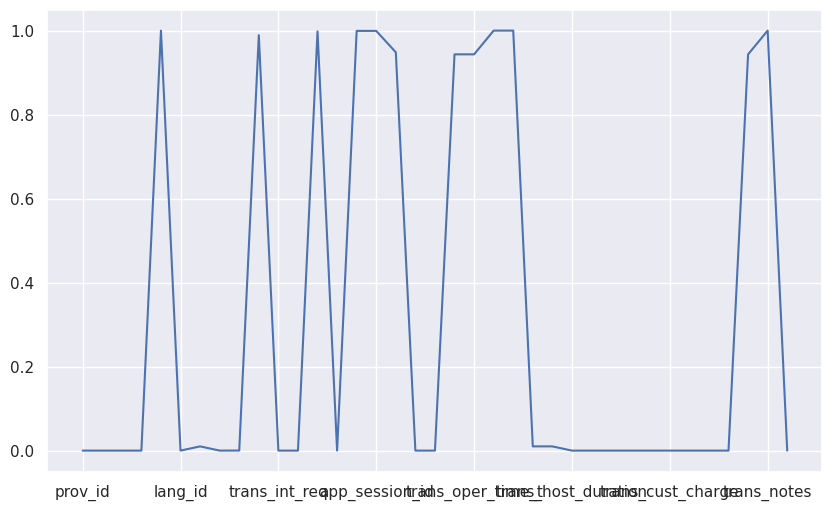

In [ ]:
dfp = df.isnull().sum()/len(df)
dfp.plot(figsize = (10,6),grid = True)


In [ ]:
col_null = df.columns[df.isnull().any()]
j = 0
for i in col_null:
    print(i)
    j+=1
print('\nNumber of columns which have missing values: %i'%j)

cont_id
lang_id
int_id
trans_int_call_id
trans_backup_call_id
trans_reference_number
app_request_id
app_session_id
trans_int_rating
trans_oper_time
trans_oper_time_t
trans_oper_req_time
trans_oper_req_time_t
trans_int_rate
trans_int_pay
trans_oper_reason
trans_notes

Number of columns which have missing values: 17


In [ ]:
dfp

prov_id                   0.000000
trans_hostname            0.000000
cust_id                   0.000000
site_id                   0.000000
cont_id                   1.000000
lang_id                   0.000022
int_id                    0.010050
trans_client_call_id      0.000000
trans_int_call_id         0.000151
trans_backup_call_id      0.989111
trans_int_req             0.000000
trans_blacklisted         0.000000
trans_reference_number    0.998128
trans_intercept           0.000000
app_request_id            0.999311
app_session_id            0.999311
trans_int_rating          0.948458
trans_start_time_t        0.000000
trans_end_time_t          0.000000
trans_oper_time           0.943487
trans_oper_time_t         0.943487
trans_oper_req_time       1.000000
trans_oper_req_time_t     1.000000
trans_int_rate            0.010050
trans_int_pay             0.010050
trans_host_duration       0.000000
trans_host_rate           0.000000
trans_host_charge         0.000000
trans_cust_duration 

<Axes: xlabel='Duration', ylabel='Density'>

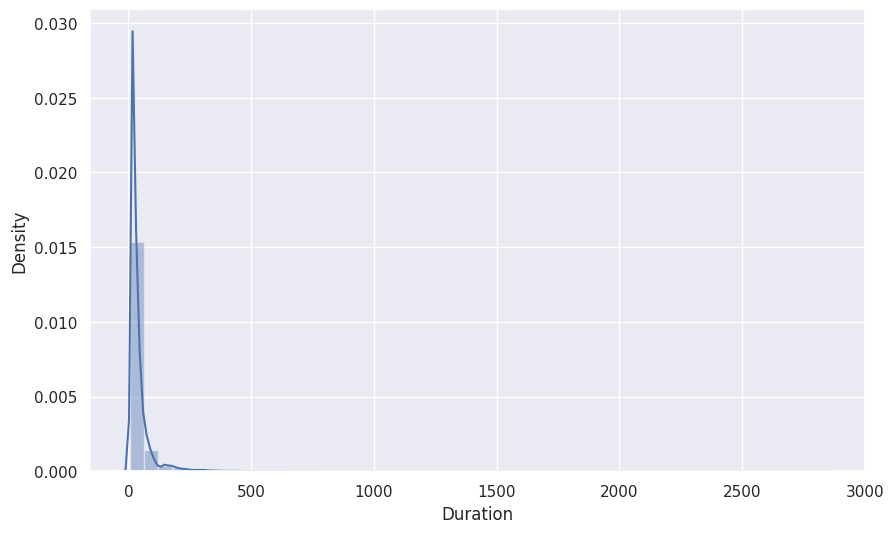

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['Duration'])

## Remove null columns

<Axes: >

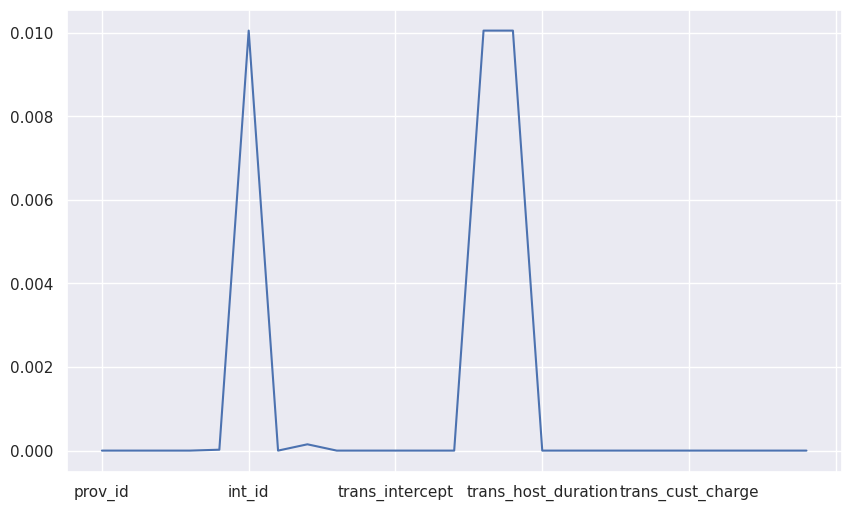

In [ ]:
df.dropna(axis=1, thresh = int(0.75*df.shape[0]), inplace=True)
dfp = df.isnull().sum()/len(df)
dfp.plot(figsize = (10,6),grid=True)

## Fill null Data

In [ ]:
smp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1 = smp.fit_transform(df)
df = pd.DataFrame(df1,columns=df.columns)
df

,prov_id,trans_hostname,cust_id,site_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,trans_int_req,trans_blacklisted,...,trans_host_duration,trans_host_rate,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,trans_call_charge,trans_crash,Duration
0,92,172.16.100.66,702.0,10408.0,2556.0,12548.0,26161913,26161917.0,Female,0,...,3870.0,14.0,9.03,3900.0,47.0,30.55,0.44,0.0,0,28.0
1,92,172.16.100.62,1088.0,23552.0,2586.0,5000.0,26161921,26161929.0,Any,0,...,417.0,14.0,0.973,420.0,42.0,2.94,0.05,0.0,0,24.0
2,92,172.16.100.63,576.0,7574.0,2562.0,2960.0,26161931,26161935.0,Any,0,...,71.0,14.0,0.1657,120.0,48.0,0.96,0.02,0.0,0,25.0
3,92,172.16.100.65,576.0,7574.0,2302.0,14104.0,26161945,26161953.0,Female,0,...,254.0,14.0,0.5927,300.0,48.0,2.4,0.02,0.0,0,14.0
4,92,172.16.100.61,312.0,4334.0,2628.0,23465.0,26161981,26161985.0,Any,0,...,981.0,14.0,2.289,1020.0,48.0,8.16,0.11,0.0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,92,172.16.100.61,1088.0,23552.0,2582.0,15738.0,27391965,27391973.0,Any,0,...,358.0,14.0,0.8353,360.0,42.0,2.52,0.04,0.0,0,65.0
46463,92,172.16.100.63,3337.0,57523.0,2628.0,7766.0,27391975,27391985.0,Any,0,...,573.0,14.0,1.337,600.0,42.0,4.2,0.06,0.0,0,28.0
46464,92,172.16.100.68,1088.0,26838.0,2314.0,12968.0,27391977,27391995.0,Any,0,...,95.0,14.0,0.2217,120.0,42.0,0.84,0.01,0.0,0,93.0
46465,92,172.16.100.63,1088.0,23552.0,2582.0,5920.0,27391983,27391991.0,Any,0,...,1606.0,14.0,3.7473,1620.0,42.0,11.34,0.18,0.0,0,23.0


## LabelEncoder

In [ ]:
lable = LabelEncoder()
df['trans_hostname'] = lable.fit_transform(df['trans_hostname'])
df['trans_int_req'] = lable.fit_transform(df['trans_int_req'])


In [ ]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
df.dtypes

prov_id                   int64
trans_hostname            int64
cust_id                 float64
site_id                 float64
lang_id                 float64
int_id                  float64
trans_client_call_id      int64
trans_int_call_id       float64
trans_int_req             int64
trans_blacklisted         int64
trans_intercept           int64
trans_start_time_t        int64
trans_end_time_t          int64
trans_int_rate          float64
trans_int_pay           float64
trans_host_duration     float64
trans_host_rate         float64
trans_host_charge       float64
trans_cust_duration     float64
trans_cust_rate         float64
trans_cust_charge       float64
trans_call_cost         float64
trans_call_charge       float64
trans_crash               int64
Duration                float64
dtype: object

## Remove column by low variance

In [ ]:
df.var().sort_values()

prov_id                 0.000000e+00
trans_call_charge       0.000000e+00
trans_host_rate         0.000000e+00
trans_blacklisted       0.000000e+00
trans_intercept         0.000000e+00
trans_crash             0.000000e+00
trans_call_cost         1.443136e-01
trans_hostname          5.221050e+00
trans_host_charge       5.369576e+00
trans_int_rate          9.052113e+00
trans_int_pay           1.013211e+01
trans_cust_charge       7.208115e+01
trans_cust_rate         8.585846e+01
trans_int_req           9.740108e+02
Duration                3.335289e+03
lang_id                 1.765974e+04
trans_cust_duration     9.829168e+05
trans_host_duration     9.862486e+05
cust_id                 1.048178e+06
int_id                  4.602275e+07
site_id                 3.816428e+08
trans_client_call_id    1.249985e+11
trans_int_call_id       1.250426e+11
trans_end_time_t        4.953807e+11
trans_start_time_t      4.953859e+11
dtype: float64

<Axes: >

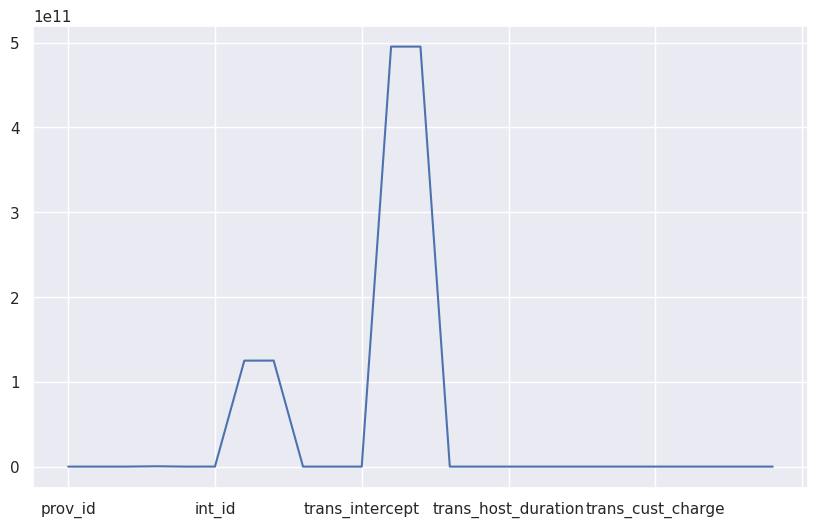

In [ ]:
df.var().plot(figsize=(10,6),grid=True)

In [ ]:
df = df.loc[:, df.var() > .001]
df

,trans_hostname,cust_id,site_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,trans_int_req,trans_start_time_t,trans_end_time_t,trans_int_rate,trans_int_pay,trans_host_duration,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,Duration
0,5,702.0,10408.0,2556.0,12548.0,26161913,26161917.0,350,1640995528,1640999398,17.0,10.73550,3870.0,9.0300,3900.0,47.0,30.55000,0.44,28.0
1,1,1088.0,23552.0,2586.0,5000.0,26161921,26161929.0,348,1640996012,1640996479,17.0,1.13617,417.0,0.9730,420.0,42.0,2.94000,0.05,24.0
2,2,576.0,7574.0,2562.0,2960.0,26161931,26161935.0,348,1640996358,1640996429,17.0,0.07367,71.0,0.1657,120.0,48.0,0.96000,0.02,25.0
3,4,576.0,7574.0,2302.0,14104.0,26161945,26161953.0,350,1640997238,1640997492,17.0,0.53550,254.0,0.5927,300.0,48.0,2.40000,0.02,14.0
4,0,312.0,4334.0,2628.0,23465.0,26161981,26161985.0,348,1640998649,1640999670,17.0,2.77950,981.0,2.2890,1020.0,48.0,8.16000,0.11,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,0,1088.0,23552.0,2582.0,15738.0,27391965,27391973.0,348,1643671899,1643672342,17.0,0.97467,358.0,0.8353,360.0,42.0,2.52000,0.04,65.0
46463,2,3337.0,57523.0,2628.0,7766.0,27391975,27391985.0,348,1643672138,1643672711,17.0,1.39683,573.0,1.3370,600.0,42.0,4.20000,0.06,28.0
46464,7,1088.0,26838.0,2314.0,12968.0,27391977,27391995.0,348,1643672166,1643672355,17.0,0.26917,95.0,0.2217,120.0,42.0,0.84000,0.01,93.0
46465,2,1088.0,23552.0,2582.0,5920.0,27391983,27391991.0,348,1643672194,1643673847,25.0,6.69167,1606.0,3.7473,1620.0,42.0,11.34000,0.18,23.0


## Outlier detection

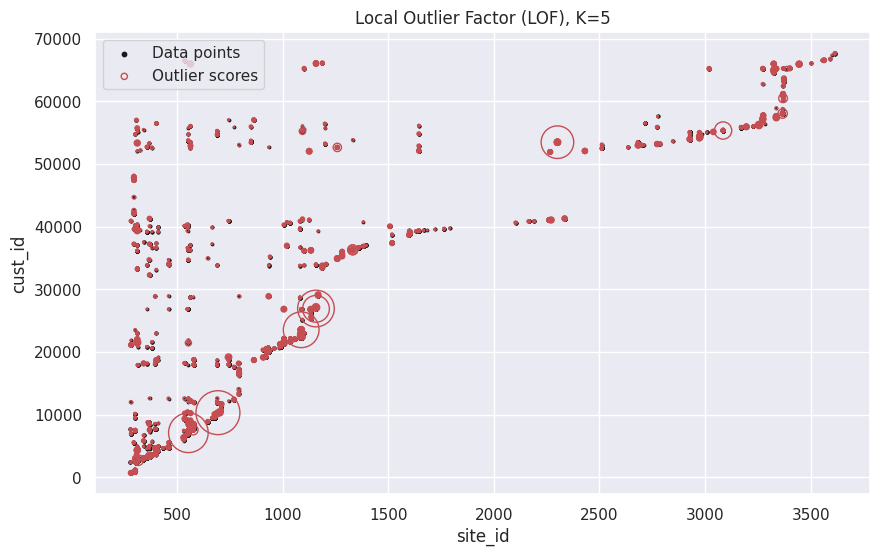

In [ ]:
var1,var2=1,2
clf = LocalOutlierFactor(n_neighbors=5, contamination=.05)
y_pred = clf.fit_predict(df)
LOF_Scores = clf.negative_outlier_factor_

plt.title('Local Outlier Factor (LOF), K={}'.format(5))
plt.scatter(df.iloc[:, var1], df.iloc[:, var2], color='k', s=3., label='Data points')
radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
plt.scatter(df.iloc[:, var1], df.iloc[:, var2], s=1000 * radius, edgecolors='r',
facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.ylabel('{}'.format(df.columns[var1]))
plt.xlabel('{}'.format(df.columns[var2]))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
lofs_index=np.where(y_pred==-1)
lofs_index = lofs_index[0]
for i in range(len(lofs_index)):
    try:
        df.drop(int(lofs_index[i]),axis=0,inplace=True)
    except:
        pass
df

,trans_hostname,cust_id,site_id,lang_id,int_id,trans_client_call_id,trans_int_call_id,trans_int_req,trans_start_time_t,trans_end_time_t,trans_int_rate,trans_int_pay,trans_host_duration,trans_host_charge,trans_cust_duration,trans_cust_rate,trans_cust_charge,trans_call_cost,Duration
0,5,702.0,10408.0,2556.0,12548.0,26161913,26161917.0,350,1640995528,1640999398,17.0,10.73550,3870.0,9.0300,3900.0,47.0,30.55,0.44,28.0
1,1,1088.0,23552.0,2586.0,5000.0,26161921,26161929.0,348,1640996012,1640996479,17.0,1.13617,417.0,0.9730,420.0,42.0,2.94,0.05,24.0
3,4,576.0,7574.0,2302.0,14104.0,26161945,26161953.0,350,1640997238,1640997492,17.0,0.53550,254.0,0.5927,300.0,48.0,2.40,0.02,14.0
5,1,554.0,8538.0,2388.0,11562.0,26161987,26161997.0,348,1640998855,1640998933,17.0,0.07367,78.0,0.1820,120.0,48.0,0.96,0.01,20.0
6,1,1088.0,23554.0,2628.0,11238.0,26161991,26162013.0,348,1640998869,1641000088,17.0,2.96650,1038.0,2.4220,1080.0,42.0,7.56,0.13,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,4,2301.0,53487.0,2266.0,14210.0,27391953,27391959.0,348,1643671447,1643672403,17.0,2.58117,956.0,2.2307,960.0,43.0,6.88,0.20,37.0
46462,0,1088.0,23552.0,2582.0,15738.0,27391965,27391973.0,348,1643671899,1643672342,17.0,0.97467,358.0,0.8353,360.0,42.0,2.52,0.04,65.0
46463,2,3337.0,57523.0,2628.0,7766.0,27391975,27391985.0,348,1643672138,1643672711,17.0,1.39683,573.0,1.3370,600.0,42.0,4.20,0.06,28.0
46464,7,1088.0,26838.0,2314.0,12968.0,27391977,27391995.0,348,1643672166,1643672355,17.0,0.26917,95.0,0.2217,120.0,42.0,0.84,0.01,93.0


In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           _41: 147.8 MiB
                           _44: 67.4 MiB
                           _10: 55.9 MiB
                           _12: 51.9 MiB
                       X_train: 47.4 MiB
                           _13: 36.9 MiB
                           _19: 34.4 MiB
                           _53: 34.4 MiB
                           _20: 30.4 MiB
                           _54: 30.4 MiB


In [ ]:
#del df2
#del _4
#del _5


## Convert categorical variable

In [ ]:
df = pd.get_dummies(df, columns=['trans_hostname','lang_id'
,'trans_int_req'], prefix='', prefix_sep='')
df

,cust_id,site_id,int_id,trans_client_call_id,trans_int_call_id,trans_start_time_t,trans_end_time_t,trans_int_rate,trans_int_pay,trans_host_duration,...,342,343,344,345,346,347,348,349,350,351
0,702.0,10408.0,12548.0,26161913,26161917.0,1640995528,1640999398,17.0,10.73550,3870.0,...,0,0,0,0,0,0,0,0,1,0
1,1088.0,23552.0,5000.0,26161921,26161929.0,1640996012,1640996479,17.0,1.13617,417.0,...,0,0,0,0,0,0,1,0,0,0
3,576.0,7574.0,14104.0,26161945,26161953.0,1640997238,1640997492,17.0,0.53550,254.0,...,0,0,0,0,0,0,0,0,1,0
5,554.0,8538.0,11562.0,26161987,26161997.0,1640998855,1640998933,17.0,0.07367,78.0,...,0,0,0,0,0,0,1,0,0,0
6,1088.0,23554.0,11238.0,26161991,26162013.0,1640998869,1641000088,17.0,2.96650,1038.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,2301.0,53487.0,14210.0,27391953,27391959.0,1643671447,1643672403,17.0,2.58117,956.0,...,0,0,0,0,0,0,1,0,0,0
46462,1088.0,23552.0,15738.0,27391965,27391973.0,1643671899,1643672342,17.0,0.97467,358.0,...,0,0,0,0,0,0,1,0,0,0
46463,3337.0,57523.0,7766.0,27391975,27391985.0,1643672138,1643672711,17.0,1.39683,573.0,...,0,0,0,0,0,0,1,0,0,0
46464,1088.0,26838.0,12968.0,27391977,27391995.0,1643672166,1643672355,17.0,0.26917,95.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = df.drop(['Duration'],axis= 1)
y = df['Duration']
a = X

## Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = pd.DataFrame(st.transform(X),columns = a.columns)

In [ ]:
X

,cust_id,site_id,int_id,trans_client_call_id,trans_int_call_id,trans_start_time_t,trans_end_time_t,trans_int_rate,trans_int_pay,trans_host_duration,...,342,343,344,345,346,347,348,349,350,351
0,-0.629417,-0.906636,-0.212173,-1.772757,-1.773044,-2.040098,-2.035935,-0.564746,3.179666,3.723789,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,-2.070102,-0.008244,2.361717,-0.11649
1,-0.250367,-0.228210,-1.331568,-1.772734,-1.773010,-2.039410,-2.040085,-0.564746,-0.603312,-0.644714,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
2,-0.753149,-1.052913,0.018588,-1.772666,-1.772942,-2.037667,-2.038645,-0.564746,-0.840029,-0.850930,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,-2.070102,-0.008244,2.361717,-0.11649
3,-0.774753,-1.003156,-0.358400,-1.772547,-1.772818,-2.035368,-2.036596,-0.564746,-1.022030,-1.073593,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
4,-0.250367,-0.228106,-0.406450,-1.772536,-1.772772,-2.035348,-2.034954,-0.564746,0.117998,0.140934,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44138,0.940794,1.316882,0.034308,1.708414,1.708098,1.764511,1.764553,-0.564746,-0.033855,0.037193,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
44139,-0.250367,-0.228210,0.260916,1.708448,1.708138,1.765153,1.764466,-0.564746,-0.666957,-0.719356,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
44140,1.958141,1.525200,-0.921360,1.708476,1.708172,1.765493,1.764991,-0.564746,-0.500589,-0.447353,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649
44141,-0.250367,-0.058603,-0.149885,1.708482,1.708200,1.765533,1.764485,-0.564746,-0.944986,-1.052086,...,-0.006731,-0.00476,-0.00476,-0.008244,-0.00476,-0.006731,0.483068,-0.008244,-0.423421,-0.11649


# Identify feature importance

In [ ]:
rfr = DecisionTreeRegressor(random_state=42)
rfr.fit(X,y)
featur_imp = pd.DataFrame({'Feature_name':X.columns, 'Importance':rfr.feature_importances_})
featur_imp = featur_imp.sort_values(by='Importance',ascending=False)
featur_imp.head(5)

,Feature_name,Importance
8,trans_int_pay,0.413871
10,trans_host_charge,0.146390
9,trans_host_duration,0.078424
14,trans_call_cost,0.035531
3,trans_client_call_id,0.033529


<Axes: xlabel='Importance', ylabel='Feature_name'>

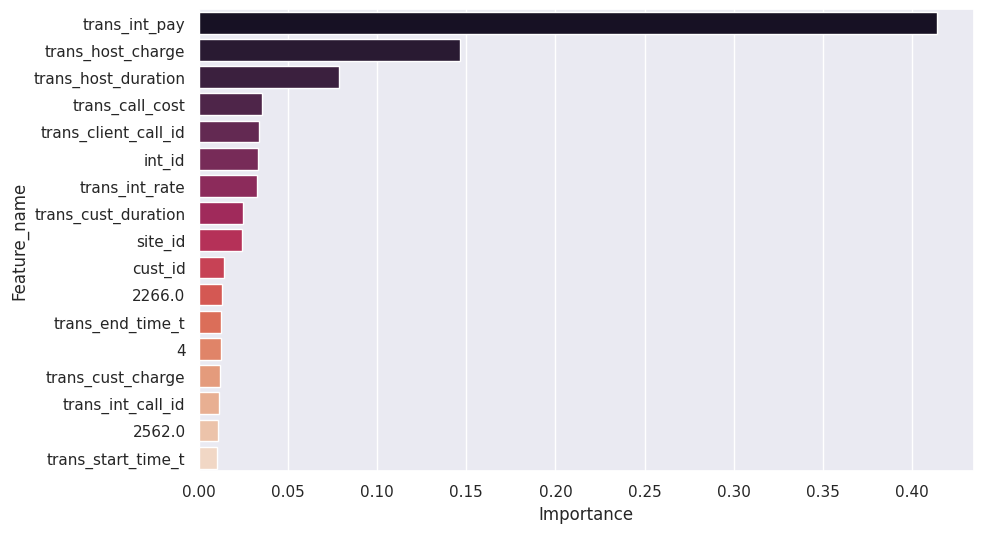

In [ ]:
featur_imp_head = featur_imp[featur_imp['Importance'] > 0.01]
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="Importance", y="Feature_name", data=featur_imp_head,palette='rocket', orient='h')


In [ ]:
col = featur_imp[featur_imp['Importance'] > 0.00]
col = col['Feature_name'].to_list()
X = X[[c for c in X.columns if c in col]]
X

,cust_id,site_id,int_id,trans_client_call_id,trans_int_call_id,trans_start_time_t,trans_end_time_t,trans_int_rate,trans_int_pay,trans_host_duration,...,329,334,340,343,345,346,348,349,350,351
0,-0.629417,-0.906636,-0.212173,-1.772757,-1.773044,-2.040098,-2.035935,-0.564746,3.179666,3.723789,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,-2.070102,-0.008244,2.361717,-0.11649
1,-0.250367,-0.228210,-1.331568,-1.772734,-1.773010,-2.039410,-2.040085,-0.564746,-0.603312,-0.644714,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
2,-0.753149,-1.052913,0.018588,-1.772666,-1.772942,-2.037667,-2.038645,-0.564746,-0.840029,-0.850930,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,-2.070102,-0.008244,2.361717,-0.11649
3,-0.774753,-1.003156,-0.358400,-1.772547,-1.772818,-2.035368,-2.036596,-0.564746,-1.022030,-1.073593,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
4,-0.250367,-0.228106,-0.406450,-1.772536,-1.772772,-2.035348,-2.034954,-0.564746,0.117998,0.140934,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44138,0.940794,1.316882,0.034308,1.708414,1.708098,1.764511,1.764553,-0.564746,-0.033855,0.037193,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
44139,-0.250367,-0.228210,0.260916,1.708448,1.708138,1.765153,1.764466,-0.564746,-0.666957,-0.719356,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
44140,1.958141,1.525200,-0.921360,1.708476,1.708172,1.765493,1.764991,-0.564746,-0.500589,-0.447353,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649
44141,-0.250367,-0.058603,-0.149885,1.708482,1.708200,1.765533,1.764485,-0.564746,-0.944986,-1.052086,...,-0.00476,-0.00476,-0.00476,-0.00476,-0.008244,-0.00476,0.483068,-0.008244,-0.423421,-0.11649


# Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(30900, 200)
(13243, 200)


In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           _41: 147.8 MiB
                           _75: 147.8 MiB
                             X: 67.4 MiB
                           _44: 67.4 MiB
                             _: 67.4 MiB
                           _78: 67.4 MiB
                           _10: 55.9 MiB
                           _12: 51.9 MiB
                       X_train: 47.4 MiB
                           _13: 36.9 MiB


In [ ]:
del _
del _25
del _28
del X

NameError: ignored

# Training and Run the ML Model

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=200))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               51456     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 92673 (362.00 KB)
Trainable params: 92673 

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_error"])
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
966/966 [==============================] - 9s 5ms/step - loss: 2773.6831 - mean_absolute_error: 26.9644
Epoch 2/30
966/966 [==============================] - 4s 4ms/step - loss: 2473.6743 - mean_absolute_error: 25.9493
Epoch 3/30
966/966 [==============================] - 5s 5ms/step - loss: 2283.7173 - mean_absolute_error: 24.8083
Epoch 4/30
966/966 [==============================] - 4s 4ms/step - loss: 2187.8765 - mean_absolute_error: 24.0538
Epoch 5/30
966/966 [==============================] - 3s 4ms/step - loss: 2121.2031 - mean_absolute_error: 23.8161
Epoch 6/30
966/966 [==============================] - 4s 4ms/step - loss: 2035.8130 - mean_absolute_error: 23.2960
Epoch 7/30
966/966 [==============================] - 5s 5ms/step - loss: 1984.6318 - mean_absolute_error: 22.9892
Epoch 8/30
966/966 [==============================] - 3s 4ms/step - loss: 1874.0634 - mean_absolute_error: 22.4751
Epoch 9/30
966/966 [==============================] - 4s 4ms/step - loss: 1789.9

# Evaluate The model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


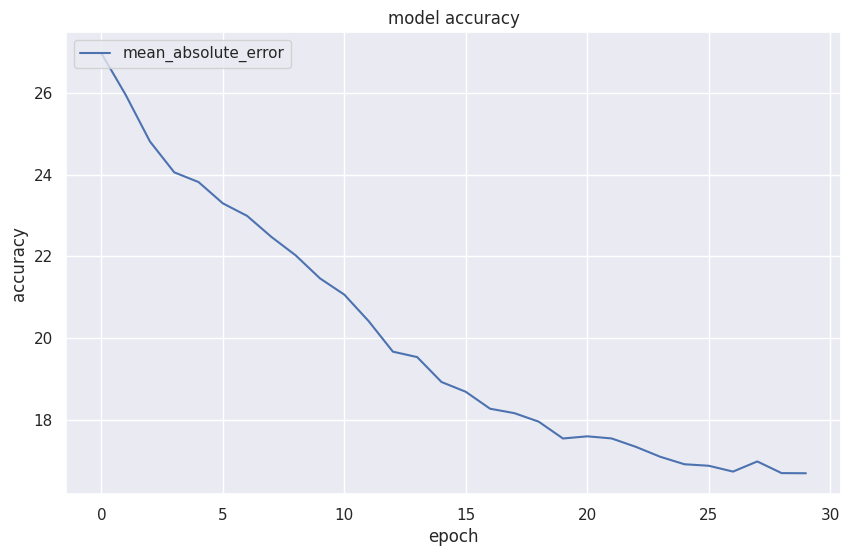

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([ 'mean_absolute_error'], loc='upper left')
plt.show()

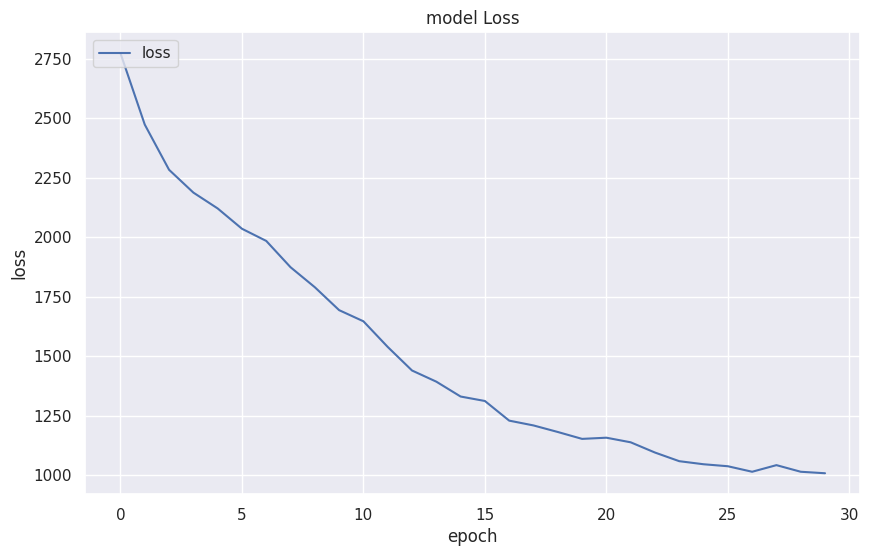

In [ ]:
plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'loss'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
result = model.predict(X_test)
mean_absolute_error(y_test,result)

414/414 [==============================] - 1s 2ms/step


16.744246057321558

<Axes: >

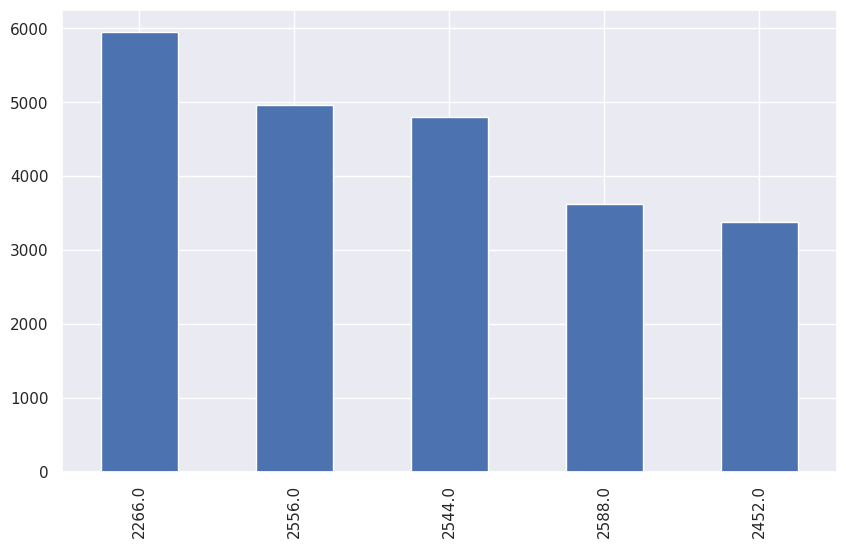

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Transaction data/1 January 2022.xlsx')
df['Duration'] = np.where((df['trans_int_time_t'].notnull()) & (df['trans_wait_time_t'].notnull()),df['trans_int_time_t']-df['trans_wait_time_t'],np.nan)
df = df.drop(['trans_id','trans_start_time','trans_end_time','trans_int_time','trans_updated','trans_wait_time_t','trans_int_time_t','trans_wait_time'],axis=1)
pd.value_counts(df['lang_id']).iloc[0:5].plot.bar()


Text(0.5, 1.0, 'The longest waiting time')

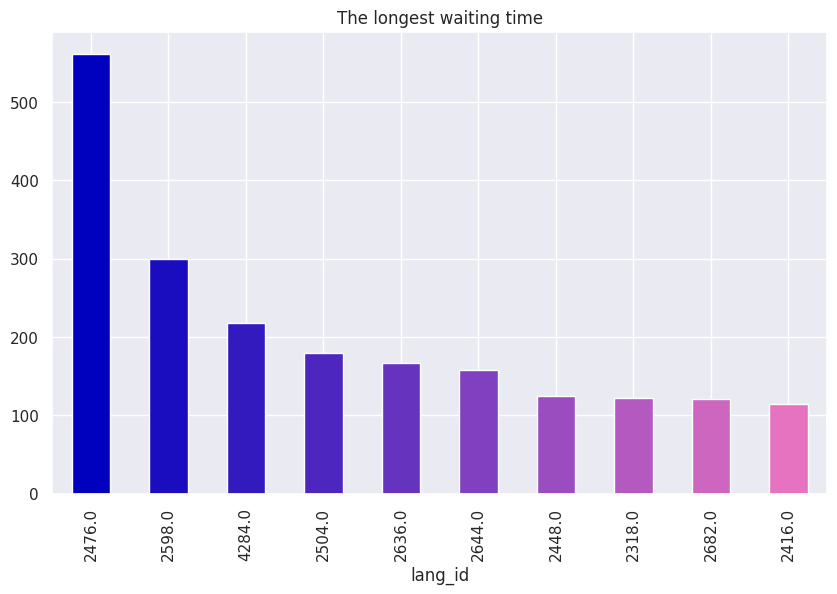

In [ ]:
my_colors = ['g', 'b']*5
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]
ax = df.groupby(['lang_id']).mean()['Duration'].sort_values(ascending = 0).iloc[0:10].plot.bar(color=my_colors)
ax.set_title("The longest waiting time")


Text(0.5, 1.0, 'The shortest waiting time')

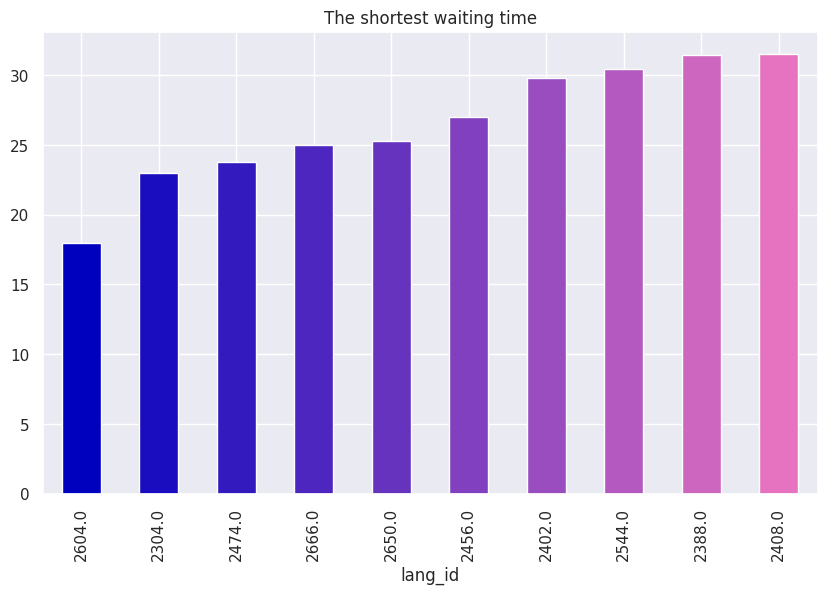

In [ ]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]
bx = df.groupby(['lang_id']).mean()['Duration'].sort_values(ascending = 1).iloc[0:10].plot.bar(color=my_colors)
bx.set_title("The shortest waiting time")
